In [1]:
# Importing the required  libraries
import pandas as pd
import numpy as np
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# importing training  data
train=pd.read_excel('C:\\Users\\Dell\\OneDrive\\Desktop\\Flight_Ticket_Participant_Datasets\\Data_Train.xlsx')

# EDA

In [4]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train.shape

(10683, 11)

**Checking Null values**

In [7]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Very less null values are present. 

In [8]:
# dropping null values
train.dropna(inplace=True)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


**Data description**

In [10]:
train.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4536,4536,2376,233,423,550,5625,8344,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.214567
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.548810
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [11]:
train["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [12]:
train["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [13]:
train["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [14]:
# importing test data
test = pd.read_excel('C:\\Users\\Dell\\OneDrive\\Desktop\\Flight_Ticket_Participant_Datasets\\Test_set.xlsx')

In [15]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [16]:
test.shape

(2671, 10)

In [17]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [18]:
test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


# Data visualisation

In [19]:
#  Univariate Analysis

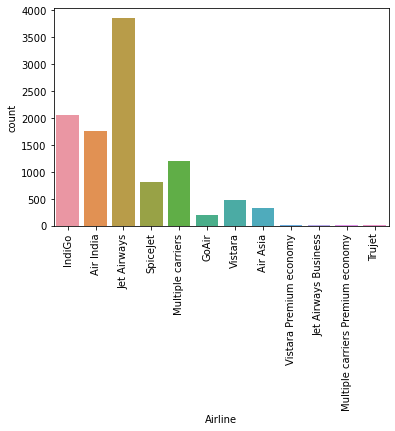

In [20]:
sns.countplot(x='Airline',data=train)
plt.xticks(rotation=90)
plt.show()

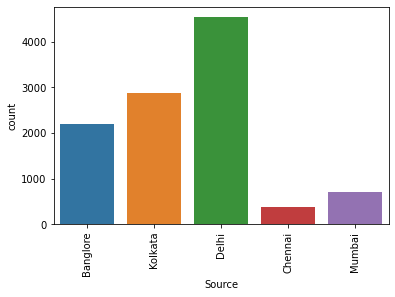

In [21]:
sns.countplot(x='Source',data=train)
plt.xticks(rotation=90)
plt.show()

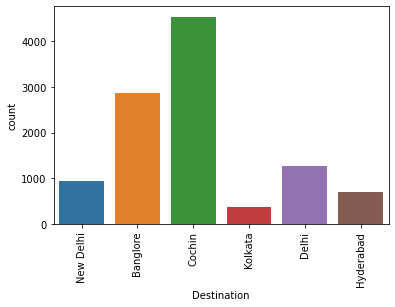

In [22]:
sns.countplot(x='Destination',data=train)
plt.xticks(rotation=90)
plt.show()

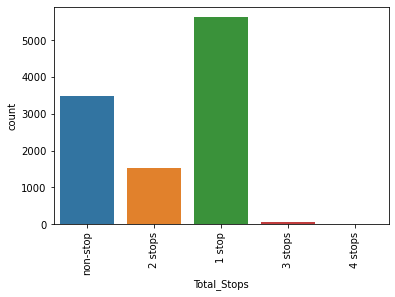

In [23]:
sns.countplot(x='Total_Stops',data=train)
plt.xticks(rotation=90)
plt.show()

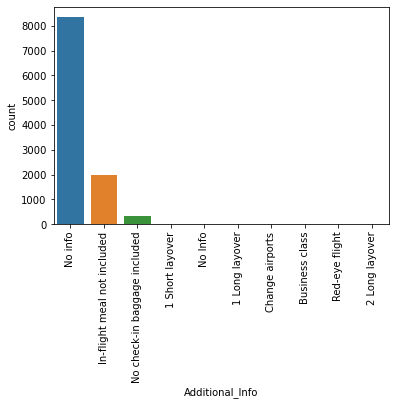

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [24]:
sns.countplot(x='Additional_Info',data=train)
plt.xticks(rotation=90)
plt.show()
train['Additional_Info'].value_counts()

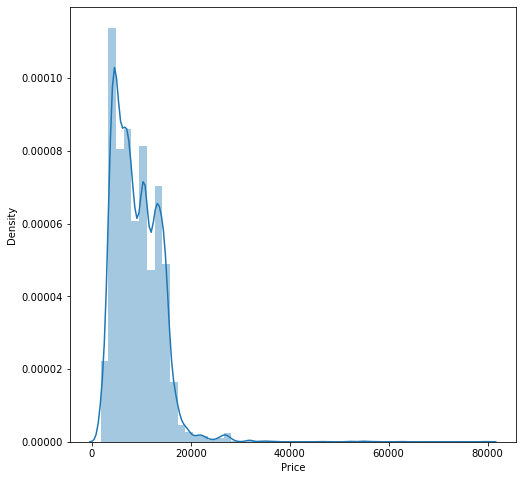

In [25]:
plt.figure(figsize=(8,8))
sns.distplot(train['Price'])
plt.show()

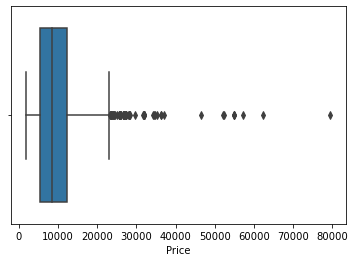

In [26]:
sns.boxplot(train['Price'])
plt.show()

In [27]:
# Multivariate Analysis

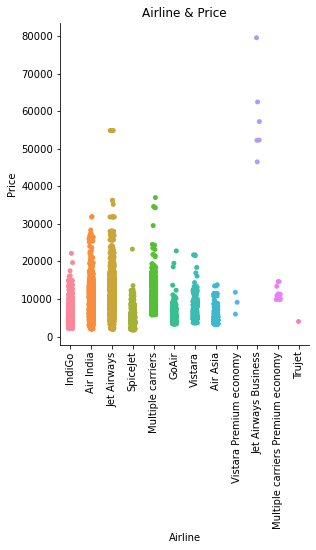

In [28]:
sns.catplot(x='Airline',y='Price',data=train)
plt.title('Airline & Price')
plt.xticks(rotation=90)
plt.show()

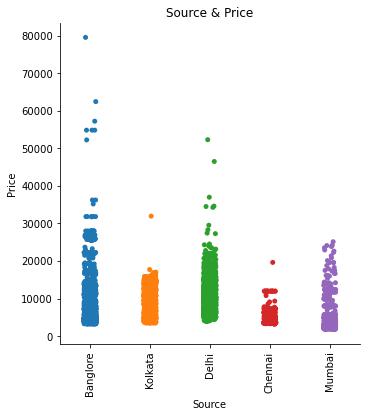

In [29]:
sns.catplot(x='Source',y='Price',data=train)
plt.title('Source & Price')
plt.xticks(rotation=90)
plt.show()

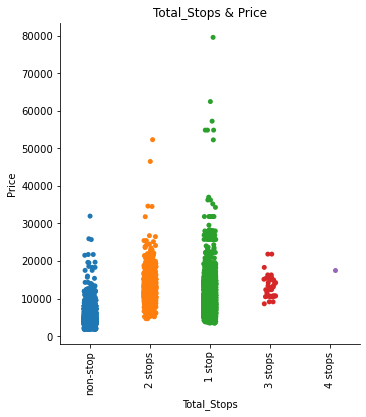

In [30]:
sns.catplot(x='Total_Stops',y='Price',data=train)
plt.title('Total_Stops & Price')
plt.xticks(rotation=90)
plt.show()

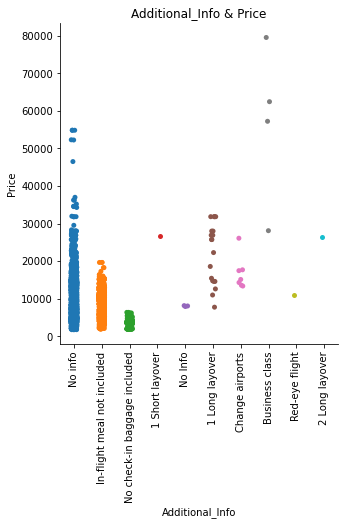

In [31]:
sns.catplot(x='Additional_Info',y='Price',data=train)
plt.title('Additional_Info & Price')
plt.xticks(rotation=90)
plt.show()

**Feature Selection:**

In [32]:
train['Duration'] = train['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test['Duration'] = test['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [33]:
train['Date_of_Journey']=pd.to_datetime(train['Date_of_Journey']).dt.month

In [34]:
test['Date_of_Journey']=pd.to_datetime(test['Date_of_Journey']).dt.month

In [35]:
train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,3,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662


In [36]:
# coverting the depature time into hours and minutes
train["Dep_hour"] = pd.to_datetime(train["Dep_Time"]).dt.hour
train.drop(["Dep_Time"], axis = 1, inplace = True)

In [37]:
test["Dep_hour"] = pd.to_datetime(test["Dep_Time"]).dt.hour
test.drop(["Dep_Time"], axis = 1, inplace = True)

In [38]:
# coverting the depature time into hours and minutes
train["Arrival_hour"] = pd.to_datetime(train.Arrival_Time).dt.hour.astype(str)
train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [39]:
test["Arrival_hour"] = pd.to_datetime(test.Arrival_Time).dt.hour.astype(str)
test.drop(["Arrival_Time"], axis = 1, inplace = True)

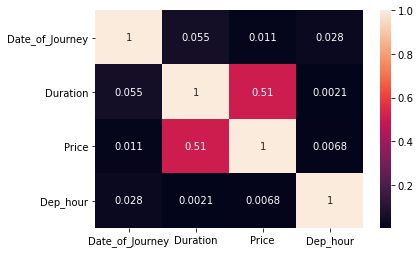

In [40]:
sns.heatmap(train.corr(), annot = True)
plt.show()

# Encoding categorical variables

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in train.columns:
    if train[i].dtype=='O':
        train[i]=le.fit_transform((train[i].astype(str)))

In [42]:
for i in test.columns:
    if test[i].dtype=='O':
        test[i]=le.fit_transform((test[i].astype(str)))

In [43]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_hour,Arrival_hour
0,3,3,0,5,18,170,4,8,3897,22,1
1,1,1,3,0,84,445,1,8,7662,5,5
2,4,9,2,1,118,1140,1,8,13882,9,18
3,3,12,3,0,91,325,0,8,6218,18,16
4,3,1,0,5,29,285,0,8,13302,16,14


# Splitting the Data into features and vectors

In [44]:
Price_test =pd.read_excel('C:\\Users\\Dell\\OneDrive\\Desktop\\Flight_Ticket_Participant_Datasets\\Sample_submission.xlsx')

In [45]:
test_data=pd.concat([test,Price_test],axis=1)

In [46]:
x=train.drop('Price',axis=1)
y=train['Price']

In [47]:
xtrain ,xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=45)

# Model Building

**1.LinearRegression**

In [49]:
lin = LinearRegression()
lin.fit(xtrain , ytrain)
ytrain_pred = lin.predict(xtrain)
print("Mean Absolute % Error: ", round(mean_absolute_error(ytrain.values, ytrain_pred)))
print("R-Squared: ", r2_score(ytrain.values, ytrain_pred))

Mean Absolute % Error:  2527
R-Squared:  0.4002652903878289


**2.Lasso Regression**

In [50]:
# Performing GridSearchCV on Lasso Regression
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor = GridSearchCV(Lasso(), params ,cv = 15,scoring = 'neg_mean_absolute_error', n_jobs = -1)
lasso_regressor.fit(xtrain, ytrain)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [51]:
# Predicting train and test results
ytrain_pred = lasso_regressor.predict(xtrain)
ytest_pred = lasso_regressor.predict(xtest)

In [52]:
print("Mean Absolute Error: ", round(mean_absolute_error(ytrain.values, ytrain_pred)))
print("R-Squared: ", r2_score(ytrain.values, ytrain_pred))

Mean Absolute Error:  2520
R-Squared:  0.39881838038571193


**3.DecisionTreeRegressor**

In [53]:
# Performing GridSearchCV on Decision Tree Regression
dt=DecisionTreeRegressor()
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree = GridSearchCV(dt, param_grid, cv = 10)
tree.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [54]:
# Predicting train and test results
ytrain_pred = tree.predict(xtrain)
ytest_pred = tree.predict(xtest)

In [55]:
print("Mean Absolute Error: ", round(mean_absolute_error(ytrain.values, ytrain_pred)))
print("R-Squared: ", r2_score(ytrain.values, ytrain_pred))

Mean Absolute Error:  949
R-Squared:  0.8803206168356141


# Conclusion:

By comparing all the models (Linear Regression, Lasso Regression, Decision Tree Regressor), we can conclude that Decision Tree Regressor performs the best.

# Saving the Model

In [56]:
import pickle
filename='flight_prediction.pkl'
pickle.dump(tree,open(filename,'wb'))